In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [2]:
!where python

c:\Users\serwesh\Zenteiq internship\venv\Scripts\python.exe
C:\Python313\python.exe
C:\Users\serwesh\AppData\Local\Programs\Python\Python310\python.exe
C:\Users\serwesh\AppData\Local\Microsoft\WindowsApps\python.exe


In [3]:
# 1. Load dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()


In [4]:
print(X_train)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


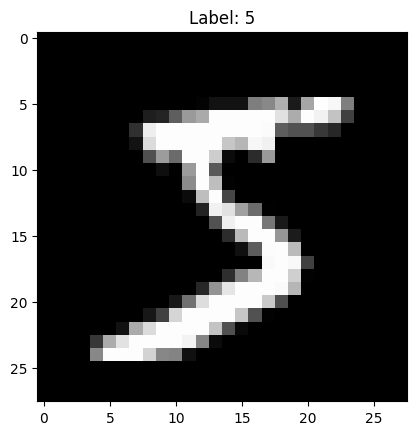

In [5]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()


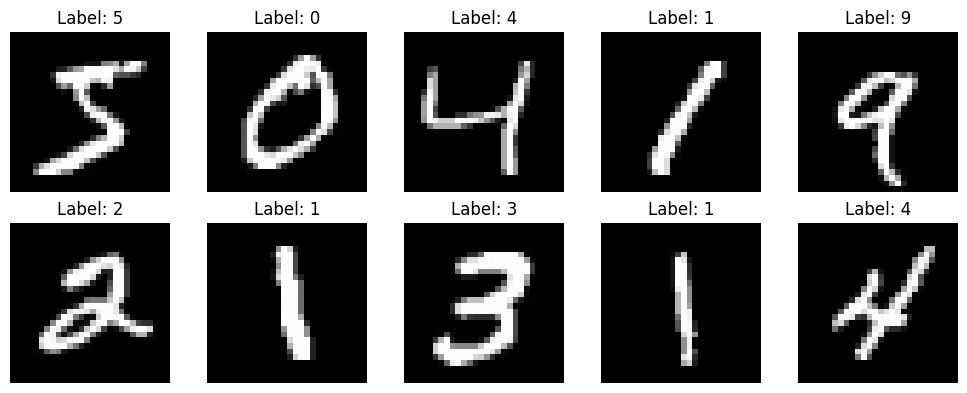

In [6]:
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


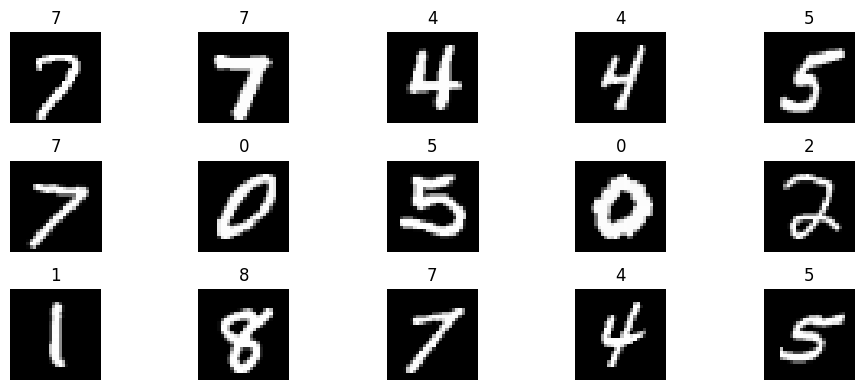

In [7]:
import numpy as np

indices = np.random.choice(len(X_train), 15, replace=False)
plt.figure(figsize=(10, 4))
for i, idx in enumerate(indices):
    plt.subplot(3, 5, i+1)
    plt.imshow(X_train[idx], cmap='gray')
    plt.title(y_train[idx])
    plt.axis('off')
plt.tight_layout()
plt.show()



In [8]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [9]:
print(X_train.dtype)      # usually uint8
print(X_train.min(), X_train.max())  # usually 0, 255


uint8
0 255


In [10]:
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

In [11]:
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)


Training data shape: (60000, 784)
Testing data shape: (10000, 784)


In [12]:
model = models.Sequential([

    layers.Dense(128, activation = 'relu', input_shape = (784,)),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')

 ])

c:\Users\serwesh\Zenteiq internship\venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [14]:
history = model.fit(X_train, y_train, epochs = 10, batch_size = 64, validation_split = 0.1)

Epoch 1/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9165 - loss: 0.2885 - val_accuracy: 0.9657 - val_loss: 0.1196
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9647 - loss: 0.1173 - val_accuracy: 0.9723 - val_loss: 0.0924
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9752 - loss: 0.0808 - val_accuracy: 0.9752 - val_loss: 0.0832
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9816 - loss: 0.0596 - val_accuracy: 0.9743 - val_loss: 0.0821
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9845 - loss: 0.0478 - val_accuracy: 0.9782 - val_loss: 0.0776
Epoch 6/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9876 - loss: 0.0383 - val_accuracy: 0.9793 - val_loss: 0.0766
Epoch 7/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9896 - loss: 0.0305 - val_accuracy: 0.9802 - val_loss: 0.0790
Epoch 8/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9919 - loss: 0.0256 - val_accuracy: 0.

In [15]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nTest_accuracy: {test_accuracy:.4f}")
print(f"\nTest_loss: {test_loss:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9803 - loss: 0.0813

Test_accuracy: 0.9803

Test_loss: 0.0813


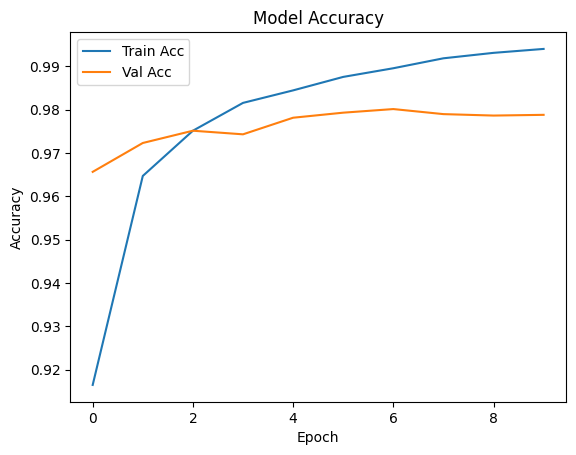

In [16]:
# 7. Plot training results
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


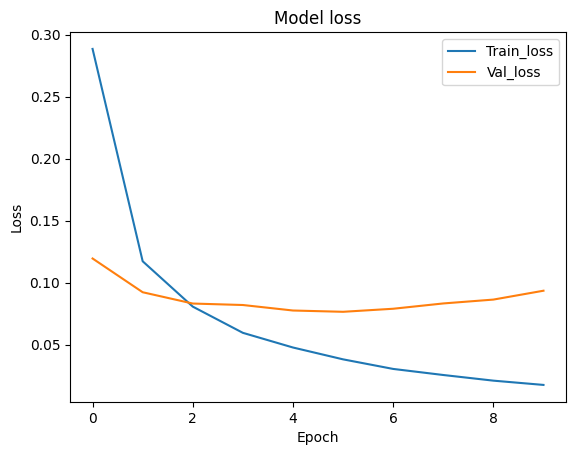

In [17]:
# 7. Plot training results
plt.plot(history.history['loss'], label='Train_loss')
plt.plot(history.history['val_loss'], label='Val_loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [18]:
# 8. Make predictions
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step


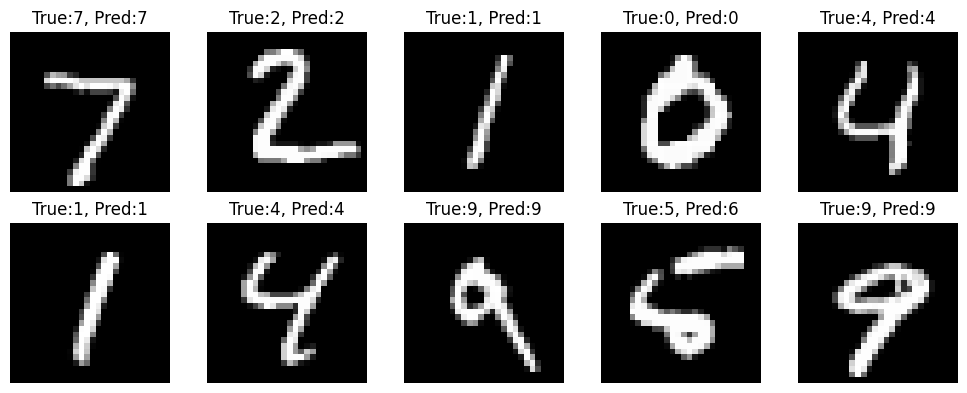

In [19]:
# 9. Visualize some results
plt.figure(figsize=(10,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_test[i].reshape(28,28), cmap='gray')
    plt.title(f"True:{y_test[i]}, Pred:{predicted_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [21]:
model.save("ANN.keras")

In [22]:
loaded_model = tf.keras.models.load_model("ANN.keras")